<a href="https://colab.research.google.com/github/mebirtukan/EyeMovementEventDetectionAlgorithms/blob/main/Mannual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from sklearn.metrics import f1_score 

import os
import glob

In [ ]:
!wget www.kasprowski.pl/datasets/events.zip
!unzip events.zip > xx

--2022-07-28 09:09:29--  http://www.kasprowski.pl/datasets/events.zip
Resolving www.kasprowski.pl (www.kasprowski.pl)... 94.152.164.213
Connecting to www.kasprowski.pl (www.kasprowski.pl)|94.152.164.213|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2909538 (2.8M) [application/zip]
Saving to: ‘events.zip’

events.zip          100%[===================>]   2.77M  2.67MB/s    in 1.0s    

2022-07-28 09:09:31 (2.67 MB/s) - ‘events.zip’ saved [2909538/2909538]



In [ ]:
def openfile(filename):
  mat = loadmat(filename)
  mdata = mat['ETdata']
  mtype = mdata.dtype
  ndata = {n: mdata[n][0,0] for n in mtype.names}
  data_headline = ndata['pos']
  data_headline = data_headline[0]
  data_raw = ndata['pos']
  pdata = pd.DataFrame(data_raw,columns=data_headline)
  df=pd.DataFrame(pdata)
  df=pd.DataFrame(pdata)
  df[1.0]=df[1.0].astype(int)
  x=pdata.iloc[:, 3:5].values
  y=pdata.iloc[:, 5].values
  print("File",filename,"opened")
  return x ,y

In [ ]:
x,y=openfile('data/UH21_img_Rome_labelled_RA.mat')


File data/UH21_img_Rome_labelled_RA.mat opened


In [ ]:
x1, y1=openfile('data/UH21_img_Rome_labelled_MN.mat')


File data/UH21_img_Rome_labelled_MN.mat opened


In [ ]:
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix
print("RA as ground truth")
print(classification_report(y, y1))
print(confusion_matrix(y, y1))
CM=confusion_matrix(y, y1)

print("MN as ground truth")
print(classification_report(y1, y))
print(confusion_matrix(y1, y))
CM=confusion_matrix(y1, y)

## Create LaTEX table!
for row in range(CM.shape[0]):
  for col in range(CM.shape[1]):
    print(CM[row,col],end='& ')
  print('\\\\')  


RA as ground truth
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      4165
           2       0.92      0.96      0.94       462
           3       0.88      0.82      0.85       361

    accuracy                           0.97      4988
   macro avg       0.93      0.92      0.93      4988
weighted avg       0.97      0.97      0.97      4988

[[4111   28   26]
 [   4  444   14]
 [  54   10  297]]
MN as ground truth
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      4169
           2       0.96      0.92      0.94       482
           3       0.82      0.88      0.85       337

    accuracy                           0.97      4988
   macro avg       0.92      0.93      0.93      4988
weighted avg       0.97      0.97      0.97      4988

[[4111    4   54]
 [  28  444   10]
 [  26   14  297]]
4111& 4& 54& \\
28& 444& 10& \\
26& 14& 297& \\


[[0.99 0.   0.01]
 [0.06 0.92 0.02]
 [0.08 0.04 0.88]]


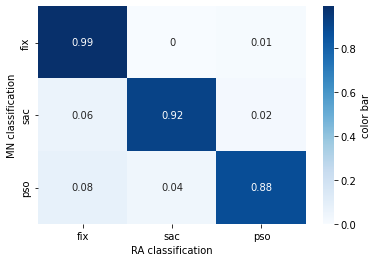

In [ ]:
import seaborn as sns
cm_normalized=np.round(CM/np.sum(CM, axis=1).reshape(-1, 1), 2)
print(cm_normalized)
sns.heatmap(cm_normalized, cmap='Blues', annot=True, cbar_kws={"orientation": "vertical", "label": "color bar"}, xticklabels=['fix','sac','pso'], yticklabels=['fix', 'sac', 'pso'])
plt.xlabel("RA classification")
plt.ylabel("MN classification")
plt.show()

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, precision_score, cohen_kappa_score, recall_score
print(cohen_kappa_score(y, y1))
print(cohen_kappa_score(y1, y))


0.9054133078487512
0.9054133078487512
